In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
sns.set_palette("YlOrBr")


In [40]:
path = r'D:\Repo\WebScraping\JobsDB\jobsdb_data_prep.csv'
df = pd.read_csv(path)

In [75]:
df

,position,company,location,salary,posted_datetime,education_level,year_of_work,job_highlight,job_desc,qualification,...,url,min_salary,max_salary,avg_salary,seniority,work_location,data_ist,hour,day,month
0,Data Scientist,GMM Grammy Public Company Limited,Wattana,NaN,2023-12-13,Degree,1.0,1-3 years of experience in Data Scientist/Adva...,{'Key Responsibilities:': ['Perform large-scal...,"{'Briefly, we are looking for passionate data ...",...,https://th.jobsdb.com//th/en/job/data-scientis...,NaN,NaN,NaN,Junior,Not specified,Data Scientist,0.0,2.0,12.0
1,Data Scientist,KASIKORNBANK PUBLIC COMPANY LIMITED,Bangkok,NaN,NaN,Degree,5.0,Data Scientist / Analytics Modeling/Experience...,{'Qualification:': ['Develop fraud management ...,{'Job Title : Data Scientist (Fraud Management...,...,https://th.jobsdb.com//th/en/job/data-scientis...,NaN,NaN,NaN,Medior,Work from home,Data Scientist,NaN,NaN,NaN
2,Officer or Engineer – Hydrology Engineering (...,CK Power Pubblic Comapany Limited,Dindaeng,NaN,NaN,NaN,NaN,Hydrology Data Analyst/Hydropower/Geospatial,{},"{""Summary of Responsibilities:\xa0 \xa0 \xa0 \...",...,https://th.jobsdb.com//th/en/job/officer-or-en...,NaN,NaN,NaN,Not specified,Not specified,Data Engineer,NaN,NaN,NaN
3,Perfect Store Manager (Data Scientist),PepsiCo,Klongtoey,NaN,NaN,Master,5.0,"Masters degree in Business, Marketing,Engineer...",{'Main purpose of the role': ['\xa0\xa0\xa0\xa...,{'Main purpose of the roleThis individual will...,...,https://th.jobsdb.com//th/en/job/perfect-store...,NaN,NaN,NaN,Medior,Not specified,Data Scientist,NaN,NaN,NaN
4,"Data Scientist, Credit Risk Model (True Money)","Ascend Group Co., Ltd.",Bangkok,NaN,NaN,Degree,2.0,Good Location/Attractive Benefit/Friendly Envi...,{'Responsibilities\xa0': ['Develop and maintai...,{'Job DescriptionWe are looking for a data sci...,...,https://th.jobsdb.com//th/en/job/data-scientis...,NaN,NaN,NaN,Junior,Not specified,Data Scientist,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,Cybersecurity Analyst,"GPV Asia (Thailand) Co., Ltd",Samutprakarn > Muang,NaN,NaN,Degree,1.0,Experience in security Operation Center/Backgr...,{},{'Prime Function :2nd level support of company...,...,https://th.jobsdb.com//th/en/job/cybersecurity...,NaN,NaN,NaN,Junior,Not specified,Other,NaN,NaN,NaN
617,Associate Client Relations Specialist - FSG Bu...,SS&C FinTech Services (Thailand) Limited,Wattana,NaN,NaN,Degree,1.0,Experience in application support role/Have kn...,{},"{""Provides daily client support, including res...",...,https://th.jobsdb.com//th/en/job/associate-cli...,NaN,NaN,NaN,Junior,Work from home,Other,NaN,NaN,NaN
618,New Grad - Java Software Engineer / Programmer...,Krungsri Bank (Bank of Ayudhya PCL.),Yannawa,NaN,NaN,Degree,NaN,"Software Engineer , Programmer , Developer/Jav...",{'Responsibilities\xa0': ['New grad of strong ...,{'Software Engineer works as a technical devel...,...,https://th.jobsdb.com//th/en/job/new-grad-java...,NaN,NaN,NaN,Junior,Hybrid,Other,NaN,NaN,NaN
619,Brokerage Operations Representative,SS&C FinTech Services (Thailand) Limited,Wattana,NaN,NaN,Degree,1.0,Work in an international environment/Flexible ...,{'Job Description:': ['Provides daily broker/d...,"{""Responsible for reconciliation of cash, trad...",...,https://th.jobsdb.com//th/en/job/brokerage-ope...,NaN,NaN,NaN,Junior,Hybrid,Other,NaN,NaN,NaN


# Viz

In [41]:
category_columns = ['position', 'company', 'location', 'year_of_work', 'education_level', 'job_level', 'job_type','company_industry','seniority', 'work_location', 'data_ist']

In [42]:

job_functions = df['job_functions']
job_functions_results = {}
for job in job_functions:
    for j in job.split(','):
        if j not in job_functions_results:
            job_functions_results[j] = 1
            continue
        job_functions_results[j] += 1
job_fun_df = pd.DataFrame([job_functions_results]).T
job_fun_df


,0
Information Technology (IT),503
Others,147
Data Scientist,107
Banking / Finance,22
Financial Services,3
...,...
Graphics,1
Web Design,1
Hospitality / F & B,1
Industrial / Product,1


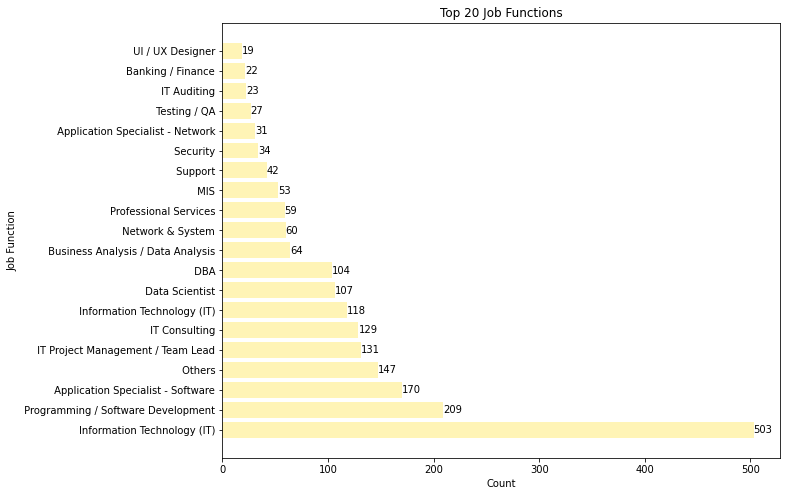

In [103]:
top_20_job_functions = job_fun_df.sort_values(by=0, ascending=False).head(20)

# Plotting
plt.figure(figsize=(10, 8))
bars = plt.barh(top_20_job_functions.index, top_20_job_functions[0])

# Add text annotations on each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}', ha='left', va='center')

plt.title('Top 20 Job Functions')
plt.xlabel('Count')
plt.ylabel('Job Function')
plt.show()

## Tree map

In [174]:
fig = px.treemap(df, 
                 path=['seniority', 'position'],  
                 hover_data=['min_salary'], 
                 title='Treemap of Minimum Salary by Seniority and Position',
                 color_discrete_sequence=sns.color_palette("YlOrBr").as_hex()) 

fig.show()


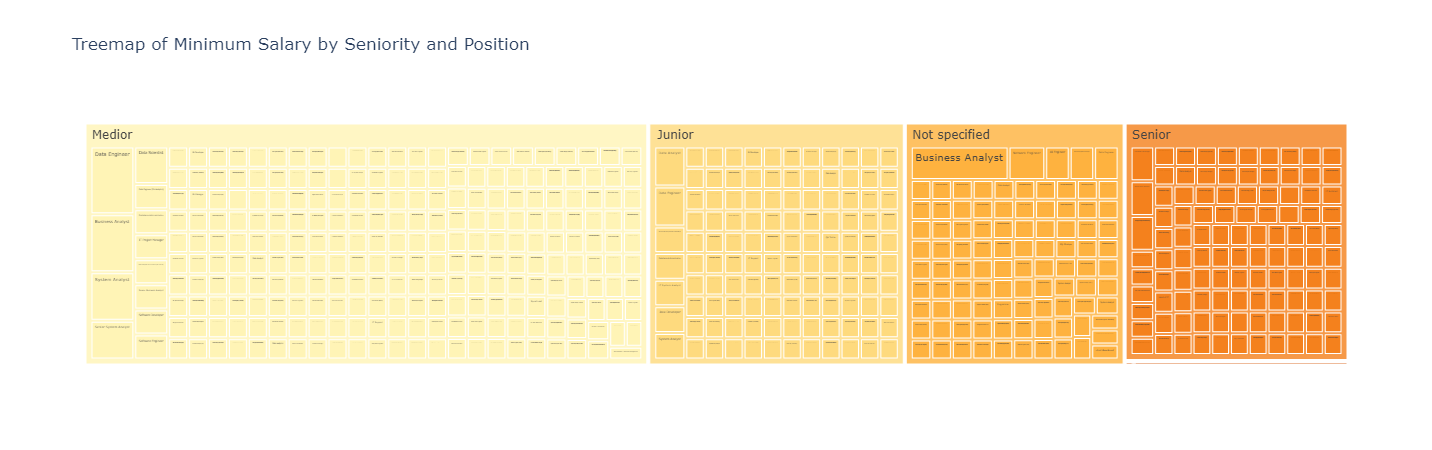

In [164]:
def treemap(df, column):
    ex_level = df[column].value_counts()
    
    fig = px.treemap(ex_level, 
                    path=[ex_level.index],
                    values=ex_level.values, 
                    title=f'<b>{column}</b>',
                    color=ex_level.index,
                    color_continuous_scale='YlOrBr',
                    color_discrete_sequence=sns.color_palette("YlOrBr").as_hex(),
                    width=1000, height=500)

    percents = np.round((100 * ex_level.values / sum(ex_level.values)).tolist(), 2)
    fig.data[0].customdata = percents
    fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata}%'

    fig.update_layout(
        font=dict(size=19, family="Franklin Gothic"))
    fig.update_traces(marker=dict(cornerradius=5))
    fig.show()


In [165]:
treemap(df=df, column='seniority')

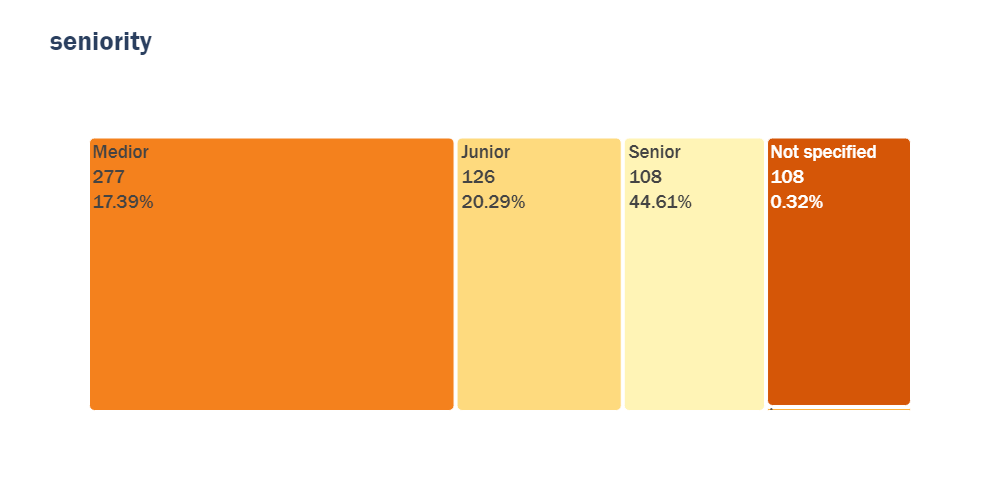

In [166]:
treemap(df=df, column='min_salary')

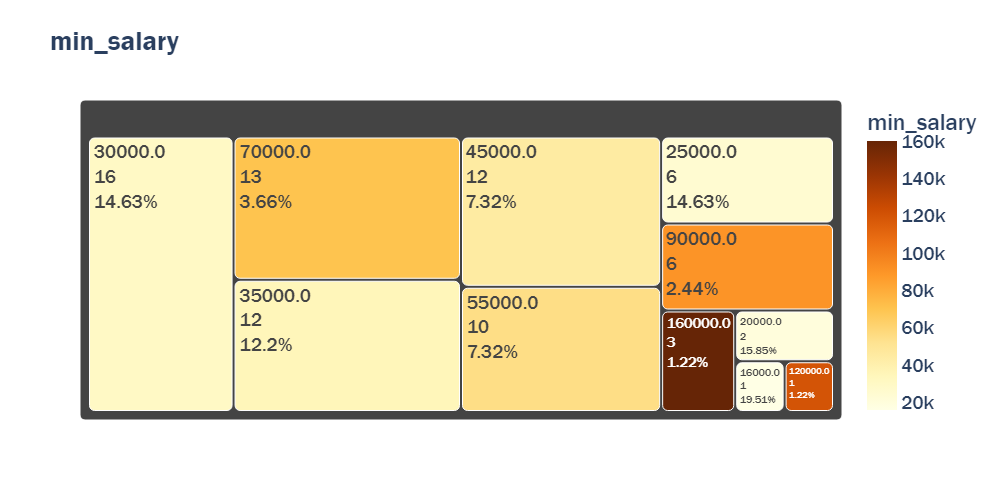

In [167]:
treemap(df=df, column='location')

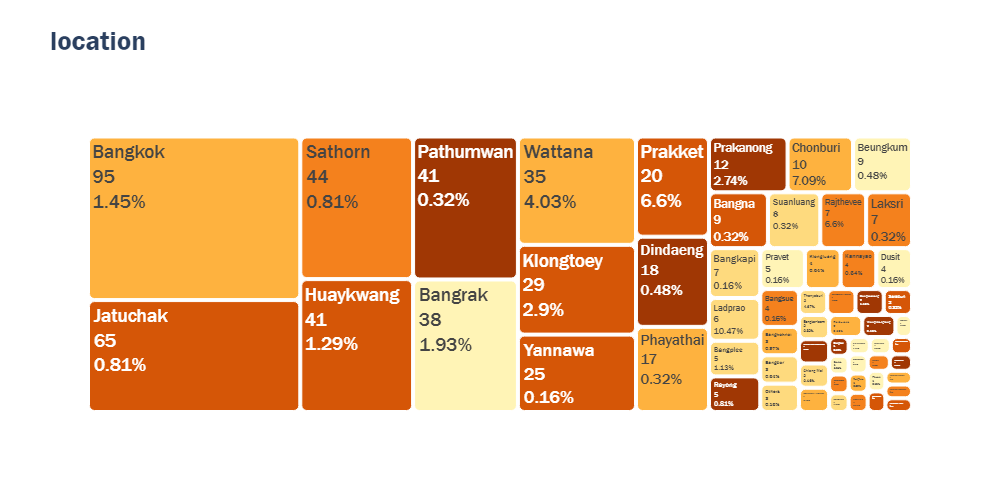

In [168]:
treemap(df=df, column='year_of_work')

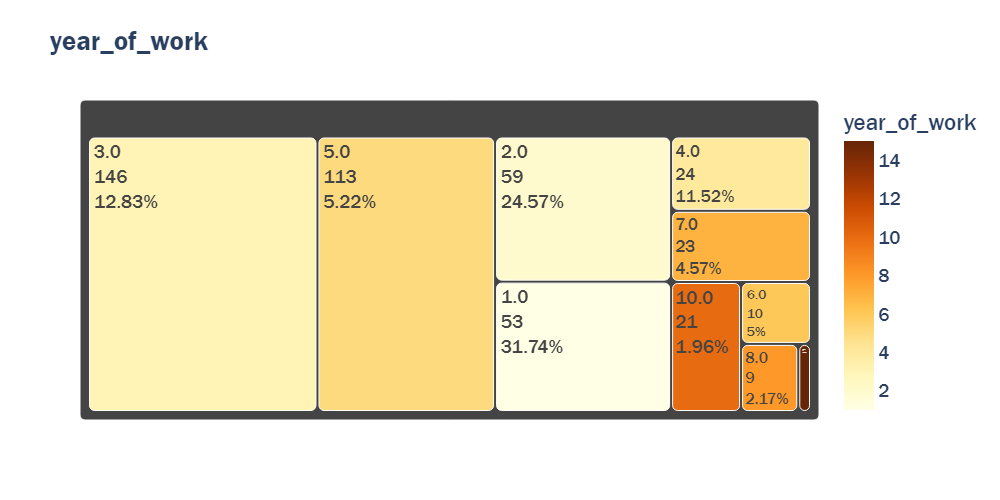

In [169]:
treemap(df=df, column='job_level')

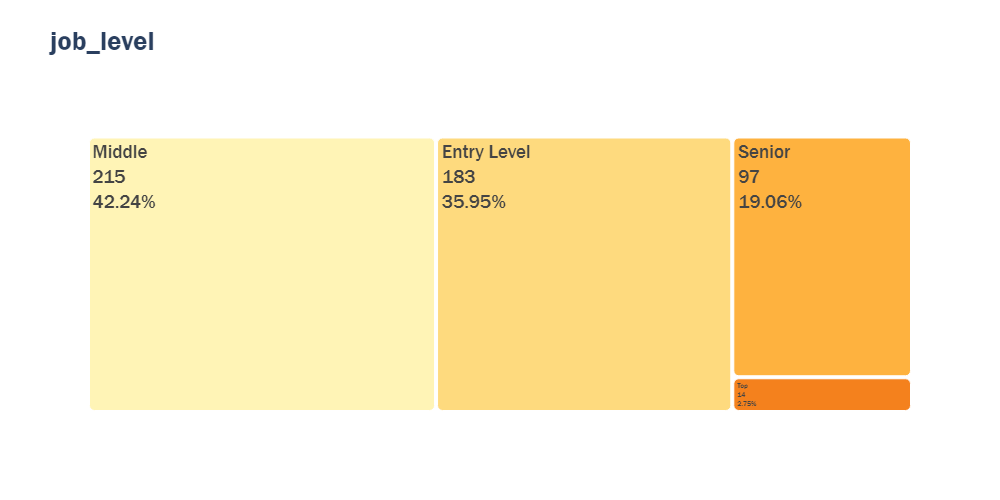

In [170]:
fig=px.treemap(df ,path=[px.Constant('Job Roles'),'data_ist','location','seniority'],
               color_continuous_scale='YlOrBr',
               color_discrete_sequence=sns.color_palette("YlOrBr").as_hex(),
               hover_name='data_ist',
               title='<b>TreeMap of Different Roles in Data_ist with seniority (Experience Level)')
fig.update_traces(root_color='lightgrey')

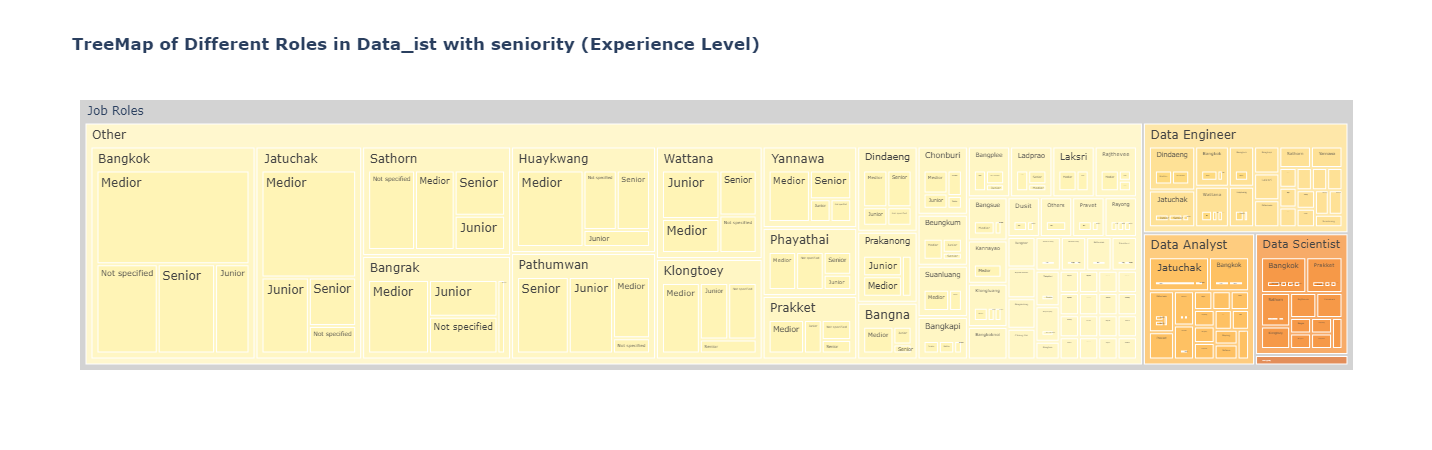

In [171]:
def plot_count_and_percentage(data, column_names, palette_name='YlOrBr'):
    num_columns = len(column_names)
    
    # Create subplots with 2 columns for each specified column
    fig, axes = plt.subplots(num_columns, 2, figsize=(14, 6 * num_columns))

    # Loop through each column
    for i, column_name in enumerate(column_names):
        # Countplot
        counts = data[column_name].value_counts().sort_values(ascending=False)
        sns.countplot(x=column_name, data=data, ax=axes[i, 0], palette=palette_name, order=counts.index)

        axes[i, 0].set_title(f'Count of {column_name}')
        axes[i, 0].set_xlabel(column_name)
        axes[i, 0].set_ylabel('Count')

        # Display number on countplot
        for p, label in zip(axes[i, 0].patches, counts):
            axes[i, 0].annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

        # Pie chart
        labels = counts.index
        sizes = counts.values

        ax = axes[i, 1]
        ax.pie(sizes, labels=labels, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(sizes) / 100), startangle=90, colors=sns.color_palette(palette_name))
        ax.set_title(f'Percentage of {column_name}')

    plt.tight_layout()
    plt.show()

c:\Users\Windows10\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Windows10\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Windows10\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Windows10\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



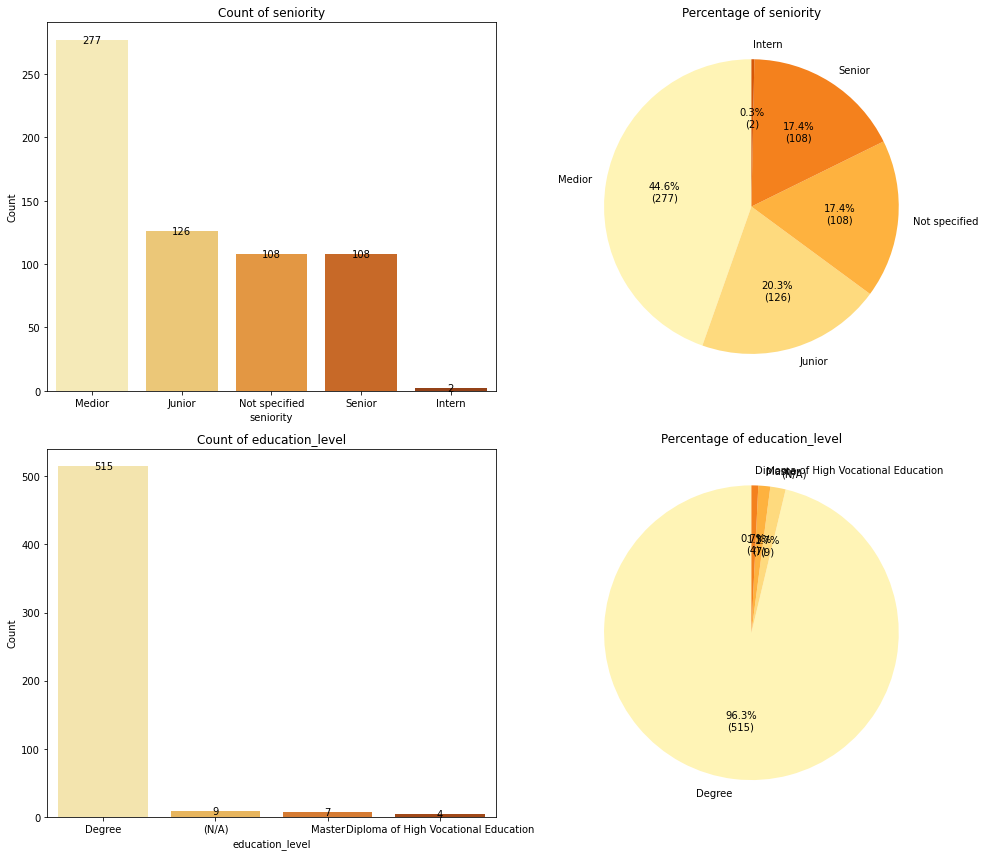

In [172]:
plot_count_and_percentage(df, ['seniority', 'education_level'])

## Salary

In [127]:
fig = px.histogram(df, x='min_salary', marginal='rug', labels={'min_salary':'Salary in USD'}, title='<b>Salary Distribution',
                   color_discrete_sequence=sns.color_palette("YlOrBr").as_hex())

fig.show()

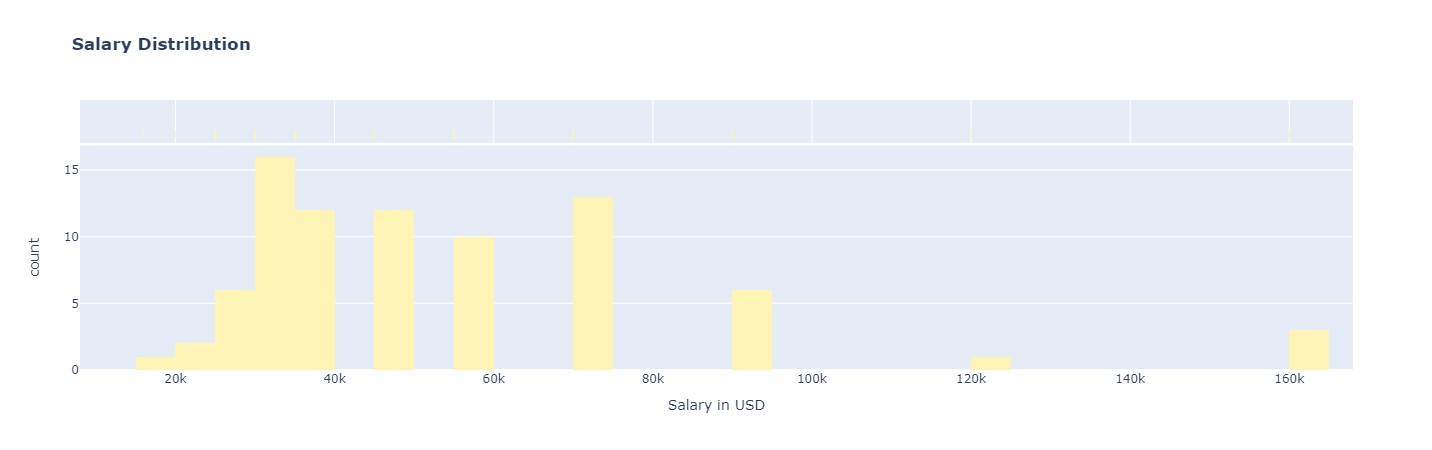

In [134]:
def plot_top_positions_by_salary(data, n_top, x, y, color_palette='YlOrBr'):
    # Set the color palette to 'YlOrBr'
    sns.set_palette(color_palette)

    # Get the top positions based on minimum salary
    top_positions = data.nlargest(n_top, x)

    # Plotting
    plt.figure(figsize=(12, 8))
    sns.barplot(x=x, y=y, data=top_positions,palette=color_palette)
    plt.xlabel('Minimum Salary (THB)')
    plt.ylabel(y)
    plt.title(f'Top {n_top} {x} by Minimum Salary')
    plt.grid(axis='x')
    plt.tight_layout()

    # Show the plot
    plt.show()

c:\Users\Windows10\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Windows10\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Windows10\AppData\Local\Temp\ipykernel_28060\3482859896.py:15: UserWarning:

Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from current font.

C:\Users\Windows10\AppData\Local\Temp\ipykernel_28060\3482859896.py:15: UserWarning:

Glyph 3636 (\N{THAI CHARACTER SARA I}) missing from current font.

C:\Users\Windows10\AppData\Local\Temp\ipykernel_28060\3482859896.py:15: UserWarning:

Glyph 3624 (\N{THAI CHARACTER SO SALA}) missing from current font.

C:\Users\Windows10\AppData\Local\Temp\ipykernel_28060\348

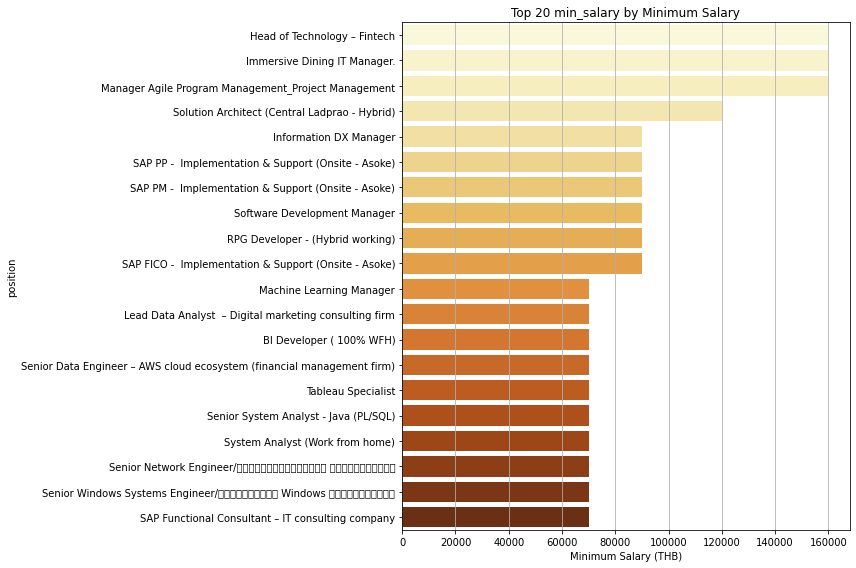

In [135]:
plot_top_positions_by_salary(df, n_top=20, x='min_salary', y='position')

c:\Users\Windows10\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Windows10\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



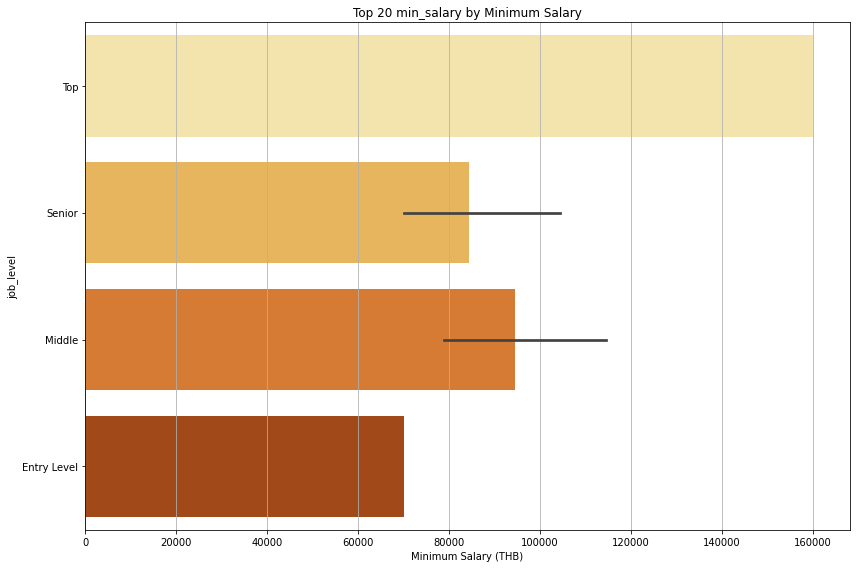

In [136]:
plot_top_positions_by_salary(df, n_top=20, x='min_salary', y='job_level')

c:\Users\Windows10\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Windows10\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



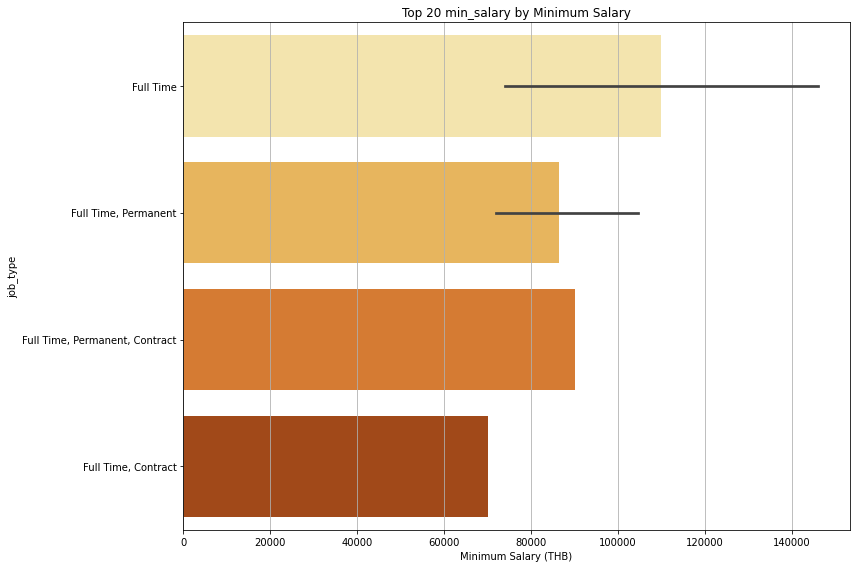

In [137]:
plot_top_positions_by_salary(df, n_top=20, x='min_salary', y='job_type')

c:\Users\Windows10\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Windows10\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



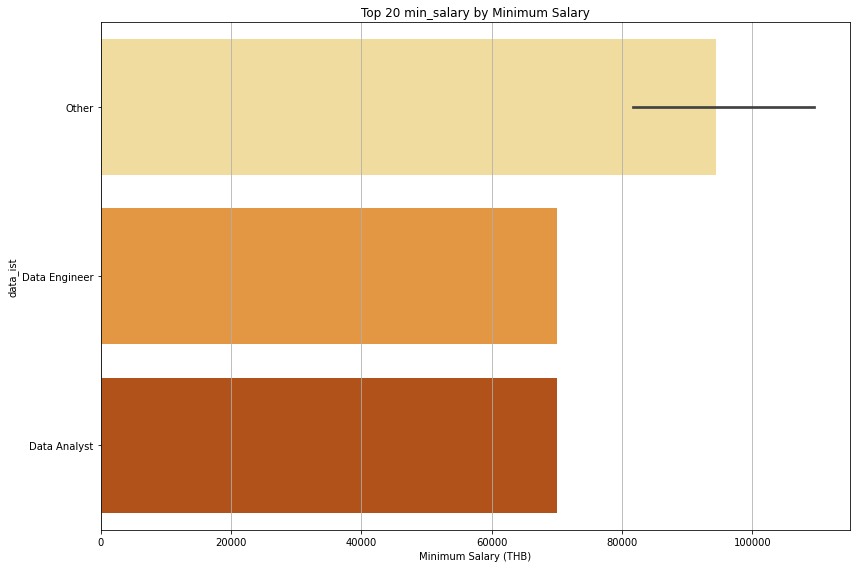

In [138]:
plot_top_positions_by_salary(df, n_top=20, x='min_salary', y='data_ist')


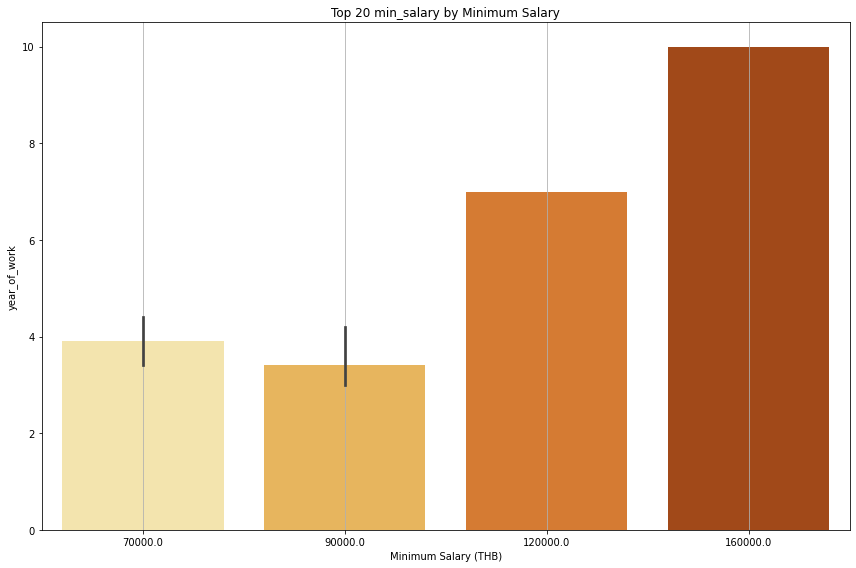

In [139]:
plot_top_positions_by_salary(df, n_top=20, x='min_salary', y='year_of_work')

c:\Users\Windows10\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Windows10\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



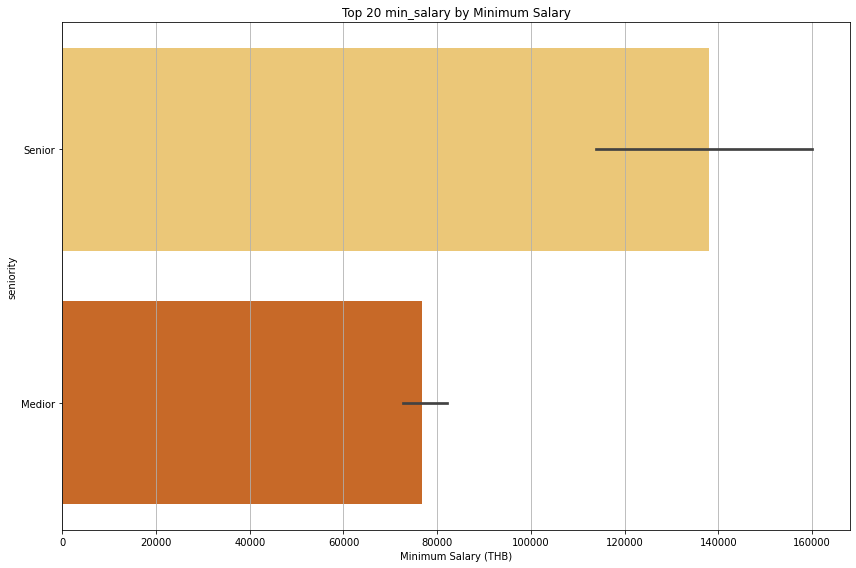

In [140]:
plot_top_positions_by_salary(df, n_top=20, x='min_salary', y='seniority')

c:\Users\Windows10\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Windows10\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



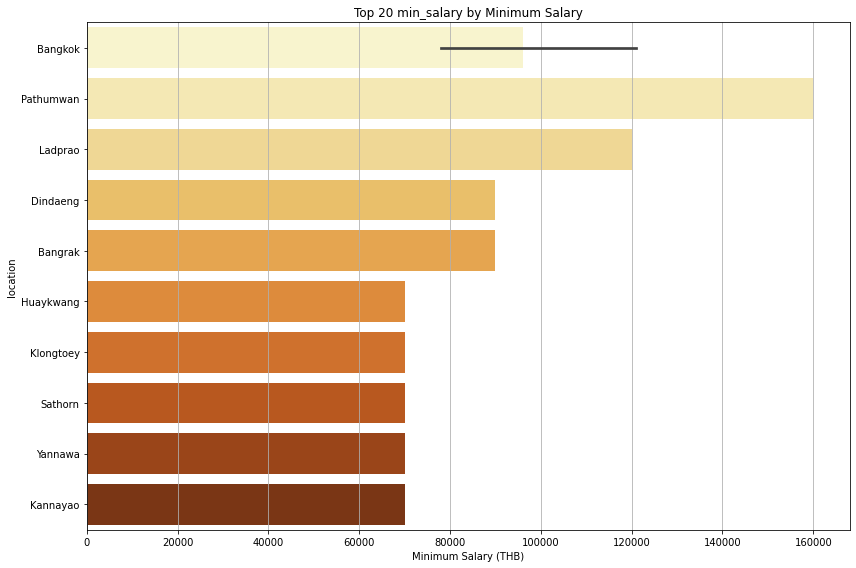

In [141]:
plot_top_positions_by_salary(df, n_top=20, x='min_salary', y='location')

In [142]:
px.histogram(df, x=df.data_ist.sort_values(), color = 'seniority', height = 800, barmode = 'group',
             color_discrete_sequence=sns.color_palette("YlOrBr").as_hex(),
             text_auto  = True, title = 'Count of number of people with seniority (experience levels) in each job')

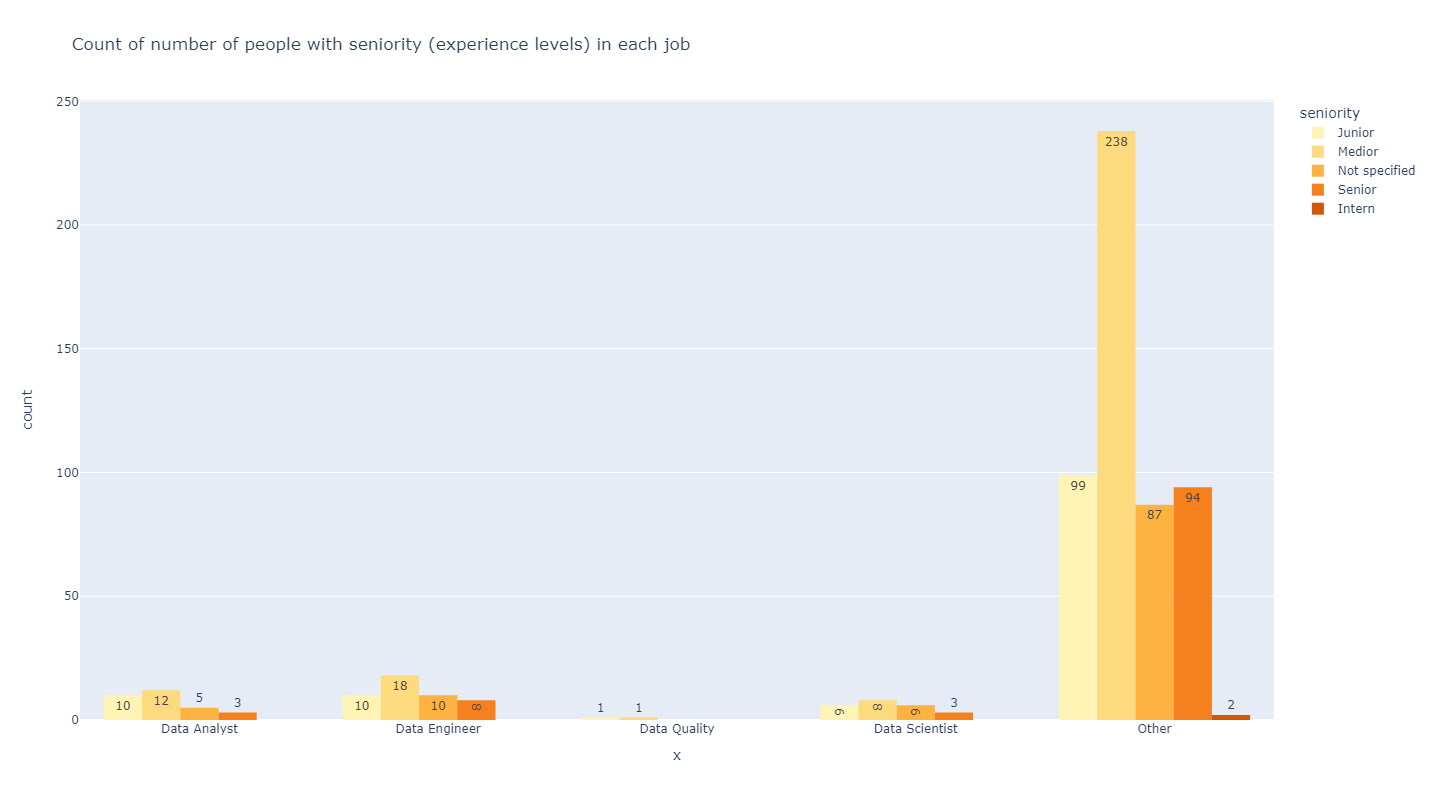

# Text Frequency

## Text Normalization
converting text data into a standardized or normalized form and to clean and make the text consistent.

- **1. Lowercasing**: Converting all text to lowercase to ensure uniformity. For example, "Hello" and "hello" become "hello."
- **2. Removing Punctuation**: Removing punctuation marks such as periods, commas, and quotation marks to focus on the text content.
- **3. Removing Stopwords**: Stopwords are common words (e.g., "the," "and," "in") that are often removed from text because they don't carry significant meaning for many NLP tasks.
- **4. Stemming and Lemmatization**: Reducing words to their root or base form. For example, "running" becomes "run." Stemming is more aggressive and might produce non-real words, while lemmatization ensures that the resulting word is a real one.
- **5. Handling Accents and Diacritics**: Replacing accented characters with their unaccented equivalents. For example, "café" becomes "cafe."
- **6. Handling Contractions**: Expanding contractions, such as changing "I've" to "I have." | "She'd" to She would" | "I'll" to "I will"
- **7. Handling Special Characters**: Replacing or removing special characters or symbols that are not relevant to the analysis.

Text normalization helps in reducing the dimensionality of the text data, making it more consistent, and ensuring that the text is prepared for further processing.

In [65]:
from scripts.text_normalization import TextNormalizer

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
import time

In [67]:
tn = TextNormalizer()

In [68]:
df_pos_norm= df['position'].apply(tn.text_normalization)

In [69]:
df_pos_norm

0                                         data scientist
1                                         data scientist
2      officer engineer hydrology engineering data an...
3                   perfect store manager data scientist
4            data scientist credit risk model true money
                             ...                        
616                                cybersecurity analyst
617    associate client relations specialist fsg busi...
618    new grad java software engineer programmer dev...
619                  brokerage operations representative
620                                 enterprise architect
Name: position, Length: 621, dtype: object

In [70]:
df_pos_norm.value_counts().head(20)

position
business analyst                          15
data engineer                             12
system analyst                             8
data analyst                               6
data scientist                             5
senior system analyst                      4
network engineer                           4
database administrator                     4
it system analyst                          3
business analyst it                        3
java developer                             3
ai engineer                                2
data scientist nakwithyaasaastrkh muul     2
software engineer                          2
it support                                 2
cloud data engineer 1 year contract        2
senior business analyst                    2
information dx manager                     2
back end developer                         2
full stack developer                       2
Name: count, dtype: int64

In [99]:
def WordCloud(df):
    time_start = time.time()

    tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(df)

    time_end = time.time()
    print(
        f"TF-IDF Vectorizer: {round(time_end - time_start, 2)} second")
    print(f'TF-IDF  shape: {tfidf_matrix.shape}')
    print('-'*100)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    print("Feature Names (Terms):", feature_names)
    stop_words = tfidf_vectorizer.get_stop_words()
    print('-'*100)
    print("Stop Words:", stop_words)
    vocabulary = tfidf_vectorizer.vocabulary_
    print("Vocabulary:", vocabulary)
    tfidf_df = pd.DataFrame([vocabulary])
    tfidf_df = pd.DataFrame(
    list(vocabulary.items()), columns=['Vocabulary', 'Count'])
    text = ' '.join(tfidf_df['Vocabulary'])
    return text, tfidf_df

In [100]:
text, tfidf_df = WordCloud(df=df_pos_norm)

TF-IDF Vectorizer: 0.01 second
TF-IDF  shape: (621, 589)
----------------------------------------------------------------------------------------------------
Feature Names (Terms): ['100' '100180' '100380' '100818' '100819' '100k' '120k' '130k' '150k'
 '19' '200' '250k' '30k' '33k' '350' '40k' '42k' '450k' '50' '50k' '55k'
 '65k' '68291' '70k' '75k' '90k' 'aawuos'
 'aawuosphathnaarabbsaarsnethsolcchistiks' 'abap' 'access' 'accounting'
 'administration' 'administrator' 'advisory' 'aec' 'aelabrihaarkh'
 'aelakaarsnabsnunkaartrwcchs' 'agile' 'ai' 'analysis' 'analyst'
 'analystics' 'analytic' 'analytics' 'android' 'angular' 'annotators'
 'application' 'architech' 'architect' 'architecture' 'ascend' 'asoke'
 'asset' 'assistant' 'associate' 'assurance' 'audit' 'auditors' 'automate'
 'automated' 'automation' 'avp' 'aws' 'ax' 'azure' 'ba' 'backend'
 'background' 'backup' 'bancassurance' 'bang' 'bangbon' 'bangkok' 'bangna'
 'banking' 'base' 'based' 'basis' 'bat' 'bearing'
 'bethkhonolyiisaarsne

In [90]:
tfidf_df.sort_values(by='Count', ascending=False)

,Vocabulary,Count
84,yindiirabedkcchbaihm,588
436,yearly,587
67,year,586
528,yai,585
132,workplace,584
...,...,...
346,100819,4
148,100818,3
285,100380,2
351,100180,1


In [144]:
from wordcloud import WordCloud, STOPWORDS

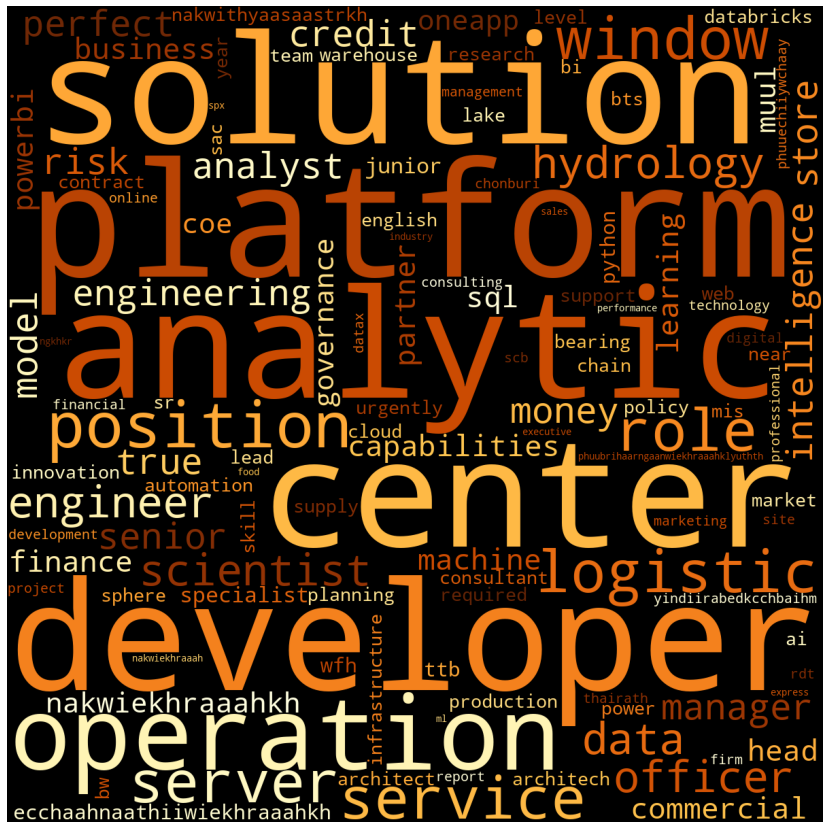

In [145]:
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color='black',colormap='YlOrBr',
                      width=1200, height=1200, max_words=121).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
